In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling

In [2]:
spy_data = pd.read_csv('data/SPY_1999-11-01_2022-05-16.csv')
spy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5672 entries, 0 to 5671
Data columns (total 6 columns):
date         5672 non-null object
1. open      5672 non-null float64
2. high      5672 non-null float64
3. low       5672 non-null float64
4. close     5672 non-null float64
5. volume    5672 non-null float64
dtypes: float64(5), object(1)
memory usage: 266.0+ KB


In [3]:
spy_data.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2022-05-16,399.98,403.97,397.60,400.09,76644007.0
1,2022-05-13,396.71,403.18,395.61,401.72,104174421.0
2,2022-05-12,389.37,395.80,385.15,392.34,125090753.0
3,2022-05-11,398.07,404.04,391.96,392.75,142360992.0
4,2022-05-10,404.49,406.08,394.82,399.09,132497200.0


In [4]:
spy_data.index = pd.to_datetime(spy_data['date'])
spy_data.head()

,date,1. open,2. high,3. low,4. close,5. volume
date,,,,,,
2022-05-16,2022-05-16,399.98,403.97,397.60,400.09,76644007.0
2022-05-13,2022-05-13,396.71,403.18,395.61,401.72,104174421.0
2022-05-12,2022-05-12,389.37,395.80,385.15,392.34,125090753.0
2022-05-11,2022-05-11,398.07,404.04,391.96,392.75,142360992.0
2022-05-10,2022-05-10,404.49,406.08,394.82,399.09,132497200.0


In [5]:
# minor cleaning of data
spy_data = spy_data.rename(columns={
    'date':'date',
    '1. open':'open',
    '2. high':'high',
    '3. low':'low',
    '4. close':'close',
    '5. volume':'volume',
})
spy_data.keys()

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

#### doing some data manipulation to try and use it in autoML from amazon

In [12]:
outgoing = spy_data['date close'.split()]
outgoing = outgoing.assign(metric_name='closing price')
outgoing = outgoing.rename(columns={'close':'metric_value', 'date':'timestamp'})
outgoing = outgoing.reset_index()
outgoing = outgoing.drop(columns=['date'])
outgoing

,timestamp,metric_value,metric_name
0,2022-05-16,400.0900,closing price
1,2022-05-13,401.7200,closing price
2,2022-05-12,392.3400,closing price
3,2022-05-11,392.7500,closing price
4,2022-05-10,399.0900,closing price
...,...,...,...
5667,1999-11-05,137.8750,closing price
5668,1999-11-04,136.5312,closing price
5669,1999-11-03,135.5000,closing price
5670,1999-11-02,134.5937,closing price


In [15]:
outgoing.to_csv('SPY-AWS-formatted.csv',index=False)

In [14]:
spy_headlines = pd.read_json('data/headlines-SPY.json')
spy_headlines.info()

TypeError: read_json() got an unexpected keyword argument 'index'

In [7]:
spy_headlines.head()

,title,publisher,date
0,5 Top Strategists Discuss Near-term Outlook fo...,By Investing.com,- 8 hours ago
1,'The Price is Wrong': S&P 500 Could Drop to 34...,By Investing.com,- 8 hours ago
2,"'Exodus From Wall Street', 'Crypto Implosion':...",By Investing.com,"- May 13, 2022"
3,"More Buying of the Dip, Bank of America's Clie...",By Investing.com,"- May 10, 2022"
4,'Paralysis Rather Than Panic Best Describes In...,By Investing.com,"- May 06, 2022"


In [8]:
spy_headlines['publisher'].apply(lambda x: x[3:]).value_counts()
# Might need to look for authors as it might provide better insights

Reuters          506
Investing.com    483
Bloomberg         18
Name: publisher, dtype: int64

In [9]:
# Doing a bit of cleaning
spy_headlines['publisher'] = spy_headlines['publisher'].apply(lambda x: x[3:])

In [10]:
spy_headlines.date = spy_headlines.date.apply(lambda x: x[3:])

In [11]:
spy_headlines.date[0] = 'May 16, 2022'
spy_headlines.date[1] = 'May 16, 2022'

In [12]:
spy_headlines.head()

,title,publisher,date
0,5 Top Strategists Discuss Near-term Outlook fo...,Investing.com,"May 16, 2022"
1,'The Price is Wrong': S&P 500 Could Drop to 34...,Investing.com,"May 16, 2022"
2,"'Exodus From Wall Street', 'Crypto Implosion':...",Investing.com,"May 13, 2022"
3,"More Buying of the Dip, Bank of America's Clie...",Investing.com,"May 10, 2022"
4,'Paralysis Rather Than Panic Best Describes In...,Investing.com,"May 06, 2022"


In [16]:
# Check for null values in the dataframe
spy_headlines.isnull().sum()

title        0
publisher    0
date         0
dtype: int64

In [15]:
# Check for possible duplicate titles, or more than one instance of an empty string
spy_headlines.title.value_counts().head(10)

U.S. stocks mixed at close of trade; Dow Jones Industrial Average up 0.13%      3
U.S. stocks mixed at close of trade; Dow Jones Industrial Average down 0.62%    3
U.S. stocks higher at close of trade; Dow Jones Industrial Average up 0.10%     2
U.S. stocks higher at close of trade; Dow Jones Industrial Average up 0.29%     2
U.S. stocks lower at close of trade; Dow Jones Industrial Average down 0.10%    2
U.S. stocks lower at close of trade; Dow Jones Industrial Average down 0.75%    2
U.S. stocks higher at close of trade; Dow Jones Industrial Average up 0.77%     2
U.S. stocks lower at close of trade; Dow Jones Industrial Average down 0.31%    2
U.S. stocks higher at close of trade; Dow Jones Industrial Average up 0.17%     2
U.S. stocks mixed at close of trade; Dow Jones Industrial Average up 0.32%      2
Name: title, dtype: int64

In [17]:
# save the relatively clean data
spy_headlines.to_csv('cleaned/spy_headlines_5-22-22.csv')

### Cutting down the data from kaggle

In [18]:
df = pd.read_csv('data/archive.zip')
df.head()

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [19]:
# Grab the 25 most talked about
most_popular = df.ticker.value_counts()
most_popular = most_popular.head(25)
most_popular

AAPL     20231
MSFT      8110
BAC       7409
AMZN      6330
NWSA      5914
BA        5879
GOOGL     5171
GS        4513
TSLA      4283
NFLX      3806
TGT       3689
INTC      3188
DIS       2875
XOM       2831
JPM       2600
MS        2498
GM        2089
C         2082
GE        2045
MU        1927
TM        1822
WMB       1482
KO        1367
WFC       1359
WMT       1267
Name: ticker, dtype: int64

In [20]:
to_save = df[df.ticker.isin(most_popular.keys())]
print('Original:',len(df))
print('Cut Down:', len(to_save))

Original: 221513
Cut Down: 104767


In [21]:
to_save.head()

,id,ticker,title,category,content,release_date,provider,url,article_id
1302,222817,INTC,Intel INTC To Post Q4 Earnings DCG CCG In...,opinion,Intel NASDAQ INTC is scheduled to report f...,2020-01-20,Zacks Investment Research,https://www.investing.com/analysis/intel-intc-...,200500288
1303,222818,INTC,Stocks Jump About 2 This Week On Trade Deals ...,opinion,The major indices just finished another positi...,2020-01-20,Zacks Investment Research,https://www.investing.com/analysis/stocks-jump...,200500165
1304,222819,INTC,Apple Partner Pegatron Plans New Facilities In...,opinion,Apple s NASDAQ AAPL assembly partner Pega...,2020-01-20,Zacks Investment Research,https://www.investing.com/analysis/apple-partn...,200500270
1305,222820,MSFT,Microsoft exposed 250M customer support records,news,Microsoft MSFT 0 1 discloses a database er...,2020-01-23,Seeking Alpha,https://invst.ly/pli4a,2065317
1306,222821,MU,Wall Street dips as investors focus on Middle ...,news,By Caroline Valetkevitch NEW YORK Reuters ...,2020-01-07,Reuters,https://www.investing.com/news/stock-market-ne...,2053896


In [22]:
# Save the relatively clean data
to_save.to_csv('cleaned/other_headlines_5-22-22.csv')

# Exploratory Data Analysis

### Visualizing the High and Low prices

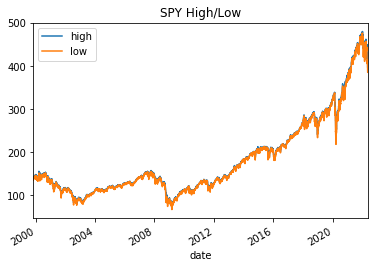

In [50]:
df = spy_data['high low'.split()]
df.plot()
plt.title('SPY High/Low');

### Calculating On-balance volume
This is usefull for looking at volume flow

`OBV = OBV_{prev} +/- volume`

In [64]:
obv = (np.sign(spy_data.close[::-1].diff()) * spy_data.volume[::-1]).fillna(0).cumsum()
obv = obv[::-1]
obv.head()

date
2022-05-16    9.871192e+09
2022-05-13    9.947836e+09
2022-05-12    9.843661e+09
2022-05-11    9.968752e+09
2022-05-10    1.011111e+10
dtype: float64

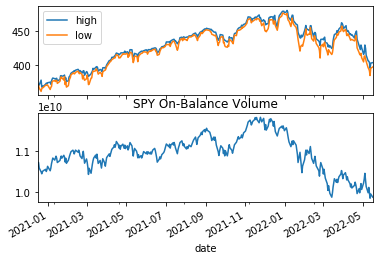

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

obv[:365].plot(ax=axes[1])
df[:356].plot(ax=axes[0])
plt.title('SPY On-Balance Volume');

### Calculating Accumulation/Distribution Line
- useful for determining money flow

$$
MFM = \frac{(Close - Low) - (High - Close)}{High - Low}
$$

$$
Money\ Flow\ Volume = MFM * Period\ Volume
$$

$$
A/D = Previous\ A/D + Current\ Money\ Flow\ Volume
$$

In [38]:
multiplier = ((spy_data.close - spy_data.low) - (spy_data.high - spy_data.close))/(spy_data.high - spy_data.low)
multiplier.head()

date
2022-05-16   -0.218210
2022-05-13    0.614267
2022-05-12    0.350235
2022-05-11   -0.869205
2022-05-10   -0.241563
dtype: float64

In [40]:
MFVolume = multiplier * spy_data.volume
MFVolume.head()

date
2022-05-16   -1.672452e+07
2022-05-13    6.399089e+07
2022-05-12    4.381113e+07
2022-05-11   -1.237409e+08
2022-05-10   -3.200643e+07
dtype: float64

In [48]:
accum_dist_indicator = MFVolume[::-1].cumsum()[::-1]
accum_dist_indicator.head()

date
2022-05-16    3.859796e+10
2022-05-13    3.861468e+10
2022-05-12    3.855069e+10
2022-05-11    3.850688e+10
2022-05-10    3.863062e+10
dtype: float64

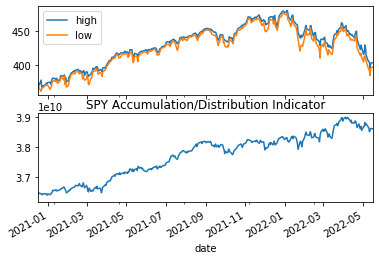

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

accum_dist_indicator[:365].plot(ax=axes[1])
df[:356].plot(ax=axes[0])
axes[1].set_title('SPY Accumulation/Distribution Indicator');

### Average Directional Index

Useful for measuring strength of momentum of a trend. When ADX is above 40, the trend is considered to have a lot of directional strength, the direction depending on the price movement

When it is below 20, it is considered to be non-trending

The ADX is the main line on the indicator, usually colored black. There are two additional lines that can be optionally shown. These are DI+ and DI-. ~These lines are often colored red and green, respectively.~ All three lines work together to show the direction of the trend as well as the momentum of the trend. 

- ADX above 20 and DI+ above DI-: That's an uptrend.
- ADX above 20 and DI- above DI+: That's a downtrend.
- ADX below 20 is a weak trend or ranging period, often associated with the DI- and DI+ rapidly crisscrossing each other.

#### ADX Formulae

$DI_+ = (\frac{Smoothed\ DM_+}{ATR}) * 100$

$DI_- = (\frac{Smoothed\ DM_-}{ATR}) * 100$

$DX = (\frac{|DI_+-DI_-|}{|DI_++DI_-|}) * 100$

$ADX = \frac{(Prev\ ADX * 13) + Current\ ADX}{14}$

In [78]:
# https://stackoverflow.com/questions/63020750/how-to-find-average-directional-movement-for-stocks-using-pandas
def ADX(data: pd.DataFrame, period: int):
    """
    Computes the ADX indicator.
    """
    
    df = data.copy()
    alpha = 1/period

    # TR
    df['H-L'] = df['high'] - df['low']
    df['H-C'] = np.abs(df['high'] - df['close'].shift(1))
    df['L-C'] = np.abs(df['low'] - df['close'].shift(1))
    df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
    del df['H-L'], df['H-C'], df['L-C']

    # ATR
    df['ATR'] = df['TR'].ewm(alpha=alpha, adjust=False).mean()

    # +-DX
    df['H-pH'] = df['high'] - df['high'].shift(1)
    df['pL-L'] = df['low'].shift(1) - df['low']
    df['+DX'] = np.where(
        (df['H-pH'] > df['pL-L']) & (df['H-pH']>0),
        df['H-pH'],
        0.0
    )
    df['-DX'] = np.where(
        (df['H-pH'] < df['pL-L']) & (df['pL-L']>0),
        df['pL-L'],
        0.0
    )
    del df['H-pH'], df['pL-L']

    # +- DMI
    df['S+DM'] = df['+DX'].ewm(alpha=alpha, adjust=False).mean()
    df['S-DM'] = df['-DX'].ewm(alpha=alpha, adjust=False).mean()
    df['+DMI'] = (df['S+DM']/df['ATR'])*100
    df['-DMI'] = (df['S-DM']/df['ATR'])*100
    del df['S+DM'], df['S-DM']

    # ADX
    df['DX'] = (np.abs(df['+DMI'] - df['-DMI'])/(df['+DMI'] + df['-DMI']))*100
    df['ADX'] = df['DX'].ewm(alpha=alpha, adjust=False).mean()
    #del df['DX'], df['ATR'], df['TR'], df['-DX'], df['+DX'], df['+DMI'], df['-DMI']
    del df['DX'], df['ATR'], df['TR'], df['-DX'], df['+DX'], df['date'], df['open'], df['high'], df['low'], df['close'], df['volume']
    
    return df

spy_adx = ADX(spy_data[::-1],14)[::-1]

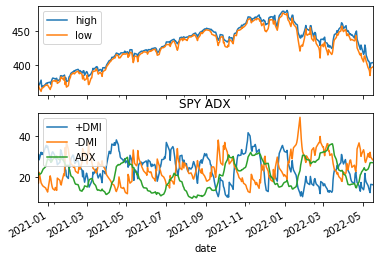

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

spy_adx[:365].plot(ax=axes[1])
df[:356].plot(ax=axes[0])
axes[1].legend(loc='upper left')
axes[1].set_title('SPY ADX');

### Text EDA

In [82]:
df = to_save
df.head()

,id,ticker,title,category,content,release_date,provider,url,article_id
1302,222817,INTC,Intel INTC To Post Q4 Earnings DCG CCG In...,opinion,Intel NASDAQ INTC is scheduled to report f...,2020-01-20,Zacks Investment Research,https://www.investing.com/analysis/intel-intc-...,200500288
1303,222818,INTC,Stocks Jump About 2 This Week On Trade Deals ...,opinion,The major indices just finished another positi...,2020-01-20,Zacks Investment Research,https://www.investing.com/analysis/stocks-jump...,200500165
1304,222819,INTC,Apple Partner Pegatron Plans New Facilities In...,opinion,Apple s NASDAQ AAPL assembly partner Pega...,2020-01-20,Zacks Investment Research,https://www.investing.com/analysis/apple-partn...,200500270
1305,222820,MSFT,Microsoft exposed 250M customer support records,news,Microsoft MSFT 0 1 discloses a database er...,2020-01-23,Seeking Alpha,https://invst.ly/pli4a,2065317
1306,222821,MU,Wall Street dips as investors focus on Middle ...,news,By Caroline Valetkevitch NEW YORK Reuters ...,2020-01-07,Reuters,https://www.investing.com/news/stock-market-ne...,2053896


In [85]:
aapl_news = df[df.ticker == 'AAPL']
aapl_news

,id,ticker,title,category,content,release_date,provider,url,article_id
49183,270698,AAPL,JPMorgan cautious ahead of Apple earnings,news,JPMorgan lifts its Apple AAPL 2 9 target f...,2020-01-28,Seeking Alpha,https://invst.ly/pnjv8,2068762
49184,270699,AAPL,FAANG s Fall but Get Some Wall Street Love,news,By Kim Khan \nInvesting com The FAANG stocks...,2020-01-28,Investing.com,https://www.investing.com/news/stock-market-ne...,2068765
49185,270700,AAPL,Wall Street tumbles as virus fuels economic worry,news,By Chuck Mikolajczak NEW YORK Reuters U S ...,2020-01-28,Reuters,https://www.investing.com/news/stock-market-ne...,2068311
49186,270701,AAPL,Earnings Watch Apple and AMD to take earnings...,news,Two of the best performing tech stocks of 2019...,2020-01-28,MarketWatch,https://invst.ly/pnlbs,2068906
49187,270702,AAPL,Day Ahead Top 3 Things to Watch for Jan 28,news,By Yasin Ebrahim and Kim Khan \n1 Apple Readi...,2020-01-28,Investing.com,https://www.investing.com/news/stock-market-ne...,2068907
...,...,...,...,...,...,...,...,...,...
69409,290924,AAPL,Waiting For Direction On The Markets,opinion,This stock market has been a difficult one for...,2012-07-16,Cam Hui,https://www.investing.com/analysis/waiting-for...,129680
69410,290925,AAPL,Mid Year Update U S And Canadian Stock Marke...,opinion,From 2004 to 2010 the TSX 300 Index of leading...,2012-07-19,Baskin Financial Blog,https://www.investing.com/analysis/mid-year-up...,130056
69411,290926,AAPL,Summer Heat Scorches Europe And U S,opinion,Europe flares as summer heat continues Summer...,2012-07-23,John Nyaradi,https://www.investing.com/analysis/summer-heat...,130439
69412,290927,AAPL,Apple Earnings Preview Quarterly Dip On Deck,opinion,Last quarter Apple AAPL reported the 2nd bes...,2012-07-23,David Dyer,https://www.investing.com/analysis/apple-earni...,130458


In [111]:
top_dict = {}
for idx in aapl_news.index:
    for word in aapl_news.loc[idx].title.split():
        if word not in top_dict.keys():
            top_dict[word] = 0
        top_dict[word] += 1

top_dict.keys()

dict_keys(['JPMorgan', 'cautious', 'ahead', 'of', 'Apple', 'earnings', 'FAANG', 's', 'Fall', 'but', 'Get', 'Some', 'Wall', 'Street', 'Love', 'tumbles', 'as', 'virus', 'fuels', 'economic', 'worry', 'Earnings', 'Watch', 'and', 'AMD', 'to', 'take', 'stage', 'amid', 'coronavirus', 'fears', 'stocks', 'sudden', 'swoon', 'Day', 'Ahead', 'Top', '3', 'Things', 'for', 'Jan', '28', 'China', 'TV', 'service', 'will', 'be', 'under', 'the', 'spotlight', 'when', 'it', 'reports', 'Stocks', 'Europe', 'Edge', 'Higher', 'Virus', 'Prompts', 'Caution', 'Tech', 'Expected', 'To', 'Turn', 'Around', 'Coronavirus', 'outbreak', 'may', 'disrupt', 'iPhone', 'production', 'ramp', 'up', 'plans', 'Nikkei', 'These', 'Bigwigs', 'Are', 'Set', 'Beat', 'This', 'Week', 'Will', 'Amazon', 'AMZN', 'Q4', 'Benefit', 'From', 'Prime', 'AWS', 'Weekly', 'Update', 'Microsoft', 'And', 'Facebook', 'Release', 'Communications', 'Services', 'Sectors', 'How', 'Big', 'Companies', 'Plunge', 'More', 'Than', '1', '5', 'On', 'Fears', 'center', 

In [115]:
df = pd.Series(top_dict)
df

JPMorgan      52
cautious      11
ahead        108
of           747
Apple       4248
            ... 
Sifting        1
Rubble         1
Snatch         1
Jaws           1
Scorches       1
Length: 18431, dtype: int64

In [126]:
df.sort_values(ascending=False).head(20)

Apple       4248
s           3211
To          2924
Earnings    2720
The         2552
In          2172
For         2022
to          1959
Stock       1867
S           1577
Stocks      1573
And         1500
On          1339
A           1332
in          1260
U           1133
Of          1130
Market       968
on           959
Is           920
dtype: int64